In [1]:
import gala.potential as gp
import astropy.units as u
import numpy as np
import gala.dynamics as gd

In [2]:
mw = gp.MilkyWayPotential()

In [4]:
gp.MilkyWayPotential?

Init signature:
gp.MilkyWayPotential(
    units=<UnitSystem (kpc, Myr, solMass, rad)>,
    disk=None,
    halo=None,
    bulge=None,
    nucleus=None,
)
Docstring:     
A simple mass-model for the Milky Way consisting of a spherical nucleus and
bulge, a Miyamoto-Nagai disk, and a spherical NFW dark matter halo.

The disk model is taken from `Bovy (2015)
<https://ui.adsabs.harvard.edu/#abs/2015ApJS..216...29B/abstract>`_ - if you
use this potential, please also cite that work.

Default parameters are fixed by fitting to a compilation of recent mass
measurements of the Milky Way, from 10 pc to ~150 kpc.

Parameters
----------
units : `~gala.units.UnitSystem` (optional)
    Set of non-reducable units that specify (at minimum) the
    length, mass, time, and angle units.
disk : dict (optional)
    Parameters to be passed to the :class:`~gala.potential.MiyamotoNagaiPotential`.
bulge : dict (optional)
    Parameters to be passed to the :class:`~gala.potential.HernquistPotential`.
halo : dict

In [4]:
xyz = [-8,0,0] * u.kpc
E = mw.energy(xyz)
E.to((u.km/u.s)**2)

<Quantity [-157181.98979398] km2 / s2>

In [5]:
acc = mw.acceleration(xyz)
acc.to(u.km/u.s/u.Myr)

<Quantity [[ 6.86666358],
           [-0.        ],
           [-0.        ]] km / (Myr s)>

In [6]:
sunpos = [8.1,0,0.02]
sunvel = [13,245,8.]

In [7]:
#initial conditions
w_0 = gd.PhaseSpacePosition(pos=sunpos * u.kpc, vel=sunvel * u.km/u.s)

In [8]:
orbit = mw.integrate_orbit(w_0, dt=1*u.Myr, t1=0, t2=2*u.Gyr)

(<Figure size 600x600 with 1 Axes>,
 <Axes3D: xlabel='$x$ [$\\mathrm{kpc}$]', ylabel='$y$ [$\\mathrm{kpc}$]', zlabel='$z$ [$\\mathrm{kpc}$]'>)

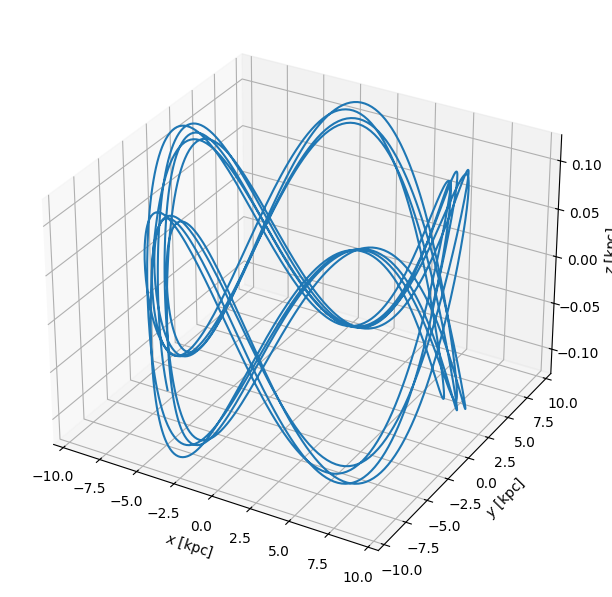

In [9]:
orbit.plot_3d(['x','y','z'])

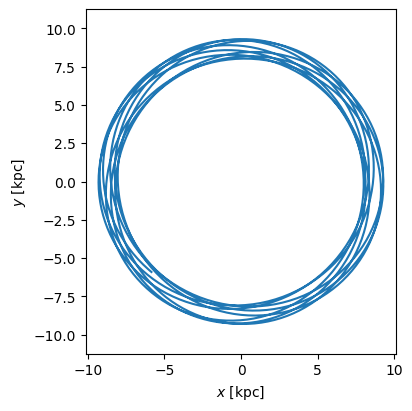

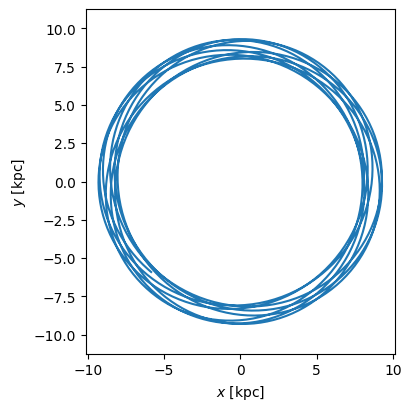

In [10]:
orbit.plot(['x','y'])